## Estimating the crack of a screen

We device a method to quatitatively estimate the crack on a damaged phone screen. Sample images of a cracked screen of approx 160 X 250 pixels are used to test this model.

__Major Processing Steps:__

**Preprocessing image >> Scanning with sliding window >> Estimate Crack %**

Each processing step is further subdivided into smaller steps and listed under corresponding step.

### Preprocessing

 - Convert to grascale image
 - Use canny edge detection to identify the cracks. The result is a binary image with `1`s where the cracks are detected and `0`s elsewhere.

In [1]:
# importing necessary libraries
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread
from skimage import feature, img_as_bool
from skimage.morphology import binary_dilation, binary_erosion
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "./data/crack_1.png"
img1 = imread(url)

def preprocess(url):
    img = imread(url)
    img = rgb2gray(img)
    img_edge = binary_erosion(binary_dilation(feature.canny(img, sigma =.1)))
    return img, img_edge

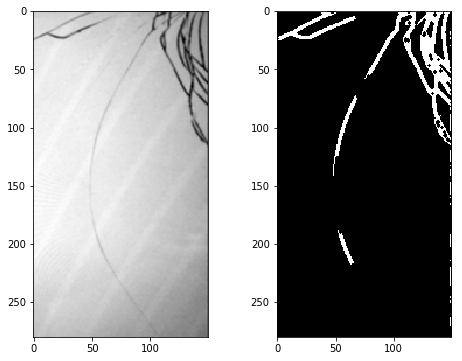

In [3]:
fig = plt.figure(figsize = (8,6))

img1,c1 = preprocess(url)

ax1 = fig.add_subplot(121)
plt.imshow(img1, cmap='gray')
ax2 = fig.add_subplot(122)
plt.imshow(c1, cmap='gray')

plt.show()

### Scanning with sliding window

 - A non-overlapping sliding window of size `10 X 10` is used to scan through the image. Each instance of the sliding window returns a label `1` or `0` based on the fraction of white pixels (crack density) present in that window. The threshold (varies from 0 to 1) for this classification can be adjusted for strict or lax classification. The sliding window allows us to draw a bounding box encompassing the crack inside.
 
 - The labels of the `i`th row and `j`th column of scanning window is aggregated using the binary matrix A(i,j). An image representation of this matrix is shown alongside processed images (as Mask).

### Estimate Crack %

 - The crack % is estimated as the fraction of `1` labels compared to the total elements in the matrix.


Estimate of crack : 15.95%


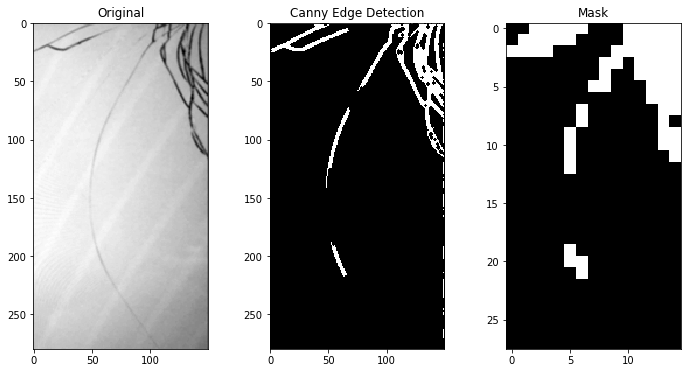

In [17]:
def edge_prob(window, cut_off):
    pixels  = np.array(window.ravel())
    if ((np.count_nonzero(pixels)/len(pixels))>cut_off):
        return 1
    else:
        return 0
    
def sliding_mat(img,window_x = 10,window_y = 10, cut_off=0.1):
    
    arr_x = np.arange(0,img.shape[0],window_x)
    arr_y = np.arange(0,img.shape[1],window_y)

    A = np.zeros((len(arr_x),len(arr_y)))

    for i,x in enumerate(arr_x):
        for j,y in enumerate(arr_y):
            window = img[x:x+window_x,y:y+window_y]
            A[i,j] = edge_prob(window, cut_off=cut_off)
    
    return A, arr_x, arr_y

def plot_all(img,canny_edge,A):
    fig = plt.figure(figsize = (12,6))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Original")
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("Canny Edge Detection")
    ax2.imshow(canny_edge, cmap="gray")
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("Mask")
    ax3.imshow(A,cmap="gray")
    plt.show()

A, arr_x, arr_y = sliding_mat(c1,window_x = 10,window_y = 10, cut_off=0.1)

print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img1,c1,A)

Shape of image (280, 150)
Shape of : A (28, 15)


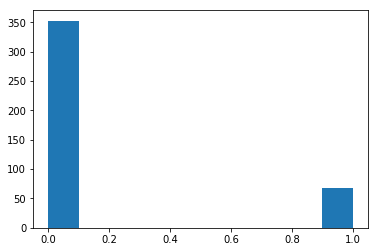

In [5]:
print("Shape of image {}\nShape of : A {}".format(c1.shape,A.shape))
plt.hist(A.ravel())
plt.show()

## Test Cases 
###  #2 Low Crack

Estimate of crack : 17.39%


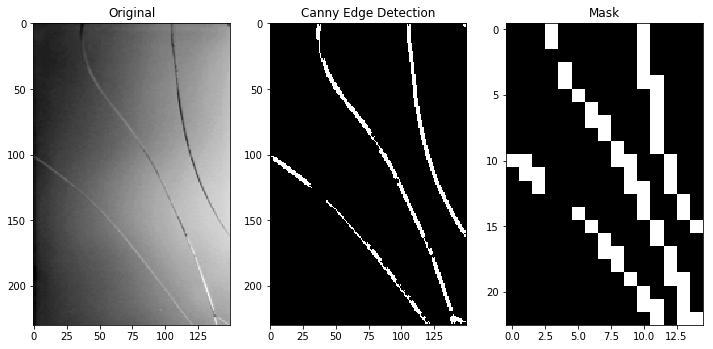

In [16]:
url_2 = "./data/crack_2.png"
img2,c2 = preprocess(url_2)
A, arr_x, arr_y = sliding_mat(c2,window_x = 10,window_y = 10, cut_off=0.1)

print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img2,c2,A)

###  #3 High Crack

Estimate of crack : 71.59%


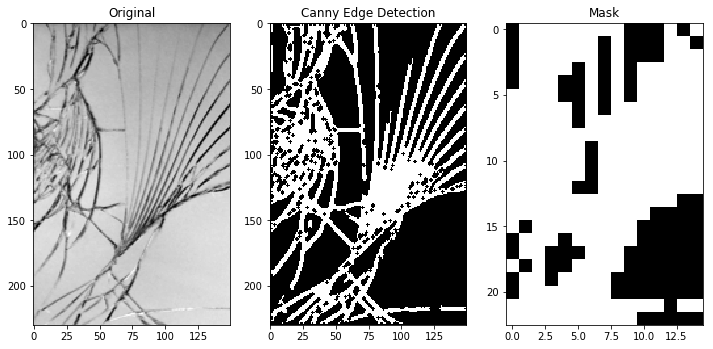

In [14]:
url_2 = "./data/crack_3.png"
img2,c2 = preprocess(url_2)
A, arr_x, arr_y = sliding_mat(c2,window_x = 10,window_y = 10, cut_off=0.1)

print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img2,c2,A)

###  #4 Medium Crack

Estimate of crack : 26.63%


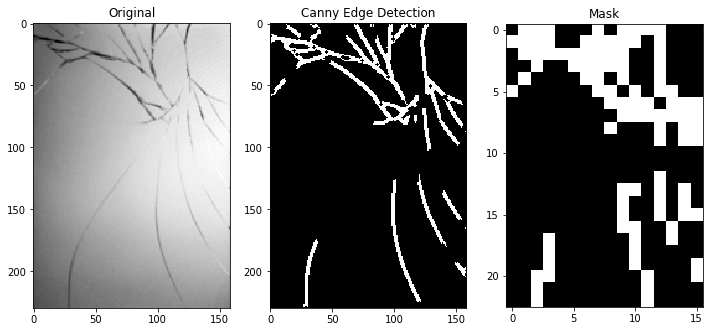

In [15]:
url_2 = "./data/crack_4.png"
img2,c2 = preprocess(url_2)
A, arr_x, arr_y = sliding_mat(c2,window_x = 10,window_y = 10, cut_off=0.1)

print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img2,c2,A)